In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [2]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw right hand connections



In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                               mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                               )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                               )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                               )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                               )

In [8]:
cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        print(ret)
        print(frame)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

True
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 

In [9]:
len(results.left_hand_landmarks.landmark)


21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

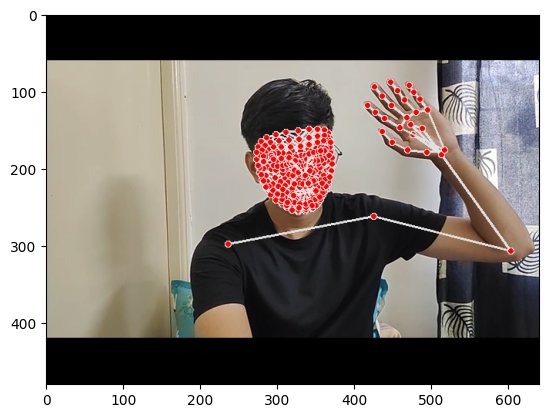

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.left_hand_landmarks.landmark)


21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)

# %%

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

# %%
result_test

# %%
468 * 3 + 33 * 4 + 21 * 3 + 21 * 3

# %%
np.save('0', result_test)

# %%
np.load('0.npy')

# %% [markdown]
# # 4. Setup Folders for Collection

# %%
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [81]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [82]:
actions.shape[0]

6

In [19]:
cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()


In [84]:
import numpy as np

# Assuming you have loaded the labels into a NumPy array named 'labels'
unique_classes = np.unique(labels)
num_classes = len(unique_classes)

print("Number of unique classes loaded:", num_classes)
print("Unique classes loaded:", unique_classes)


Number of unique classes loaded: 6
Unique classes loaded: [0 1 2 3 4 5]


In [85]:
label_map = {label: num for num, label in enumerate(actions)}

# %%
label_map

# %%
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


# %%
np.array(sequences).shape

# %%
np.array(labels).shape

# %%
X = np.array(sequences)

# %%
X.shape

# %%
y = to_categorical(labels).astype(int)

# %%
y

# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# %%
y_test.shape

(9, 6)

In [86]:
X_train.shape

(171, 30, 1662)

In [51]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
X.shape

(180, 30, 1662)

In [62]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# %%
res = [.7, 0.2, 0.1]
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define the callbacks
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            monitor='categorical_accuracy',
                                            mode='max',
                                            save_best_only=True,
                                            verbose=1)

# Define the callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Compile the model with the optimizer (without specifying learning rate)


# Train the model with the learning rate reduction callback



# %%
actions[np.argmax(res)]

# %%
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [45]:
from keras.layers import Bidirectional, LSTM, Dense, Attention, Input
from keras.models import Model

# Define input layer
inputs = Input(shape=(30, 1662))

# LSTM layers
lstm_output = Bidirectional(LSTM(64, return_sequences=True, activation='relu'))(inputs)
lstm_output = LSTM(128, return_sequences=True, activation='relu')(lstm_output)
lstm_output = LSTM(64, return_sequences=False, activation='relu')(lstm_output)

# Attention layer
attention = Attention()([lstm_output, lstm_output])  # Using the same output for both query and value

# Dense layers
dense_output = Dense(64, activation='relu')(attention)
dense_output = Dense(32, activation='relu')(dense_output)
outputs = Dense(actions.shape[0], activation='softmax')(dense_output)

# Define the model
model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=2000, callbacks=[reduce_lr, model_checkpoint_callback])


Epoch 1/2000
5/6 [========================>.....] - ETA: 0s - loss: 4.4007 - categorical_accuracy: 0.1750WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy,lr

Epoch 1: categorical_accuracy improved from -inf to 0.16959, saving model to best_model.h5
6/6 [==============================] - 4s 71ms/step - loss: 4.3831 - categorical_accuracy: 0.1696 - lr: 0.0010
Epoch 2/2000
1/6 [====>.........................] - ETA: 0s - loss: 1.9133 - categorical_accuracy: 0.1875

C:\Users\OMKAR\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/6 [========================>.....] - ETA: 0s - loss: 1.8781 - categorical_accuracy: 0.1875WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy,lr

Epoch 2: categorical_accuracy improved from 0.16959 to 0.19298, saving model to best_model.h5
6/6 [==============================] - 0s 56ms/step - loss: 1.8687 - categorical_accuracy: 0.1930 - lr: 0.0010
Epoch 3/2000
6/6 [==============================] - ETA: 0s - loss: 1.8430 - categorical_accuracy: 0.1813WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy,lr

Epoch 3: categorical_accuracy did not improve from 0.19298
6/6 [==============================] - 0s 45ms/step - loss: 1.8430 - categorical_accuracy: 0.1813 - lr: 0.0010
Epoch 4/2000
5/6 [========================>.....] - ETA: 0s - loss: 1.7729 - categorical_accuracy: 0.1813WARNING:ten

KeyboardInterrupt: 

In [65]:
# %% [markdown]
# # 8. Make Predictions

# %%
res = model.predict(X_test)

# %% [markdown]
# # 9. Save Weights

# %%
# model.save('webcam_11.0.h5')

# %%



1/1 [==============================] - 1s 1s/step


In [64]:
model.load_weights('best_model.h5')

In [67]:
model.load_weights('best_model.h5')

# %% [markdown]
# # 10. Evaluation using Confusion Matrix and Accuracy

# %%
yhat = model.predict(X_test)

# %%
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# %%
multilabel_confusion_matrix(ytrue, yhat)

# %%
accuracy_score(ytrue, yhat)

# %% [markdown]
# # 11. Test in Real Time

# %%
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (16, 245, 117), (117, 16, 245)]
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'help'])


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame


# %%

1/1 [==============================] - 0s 26ms/step


In [79]:
X_test.shape

(9, 30, 1662)

6/6 [==============================] - 0s 41ms/step


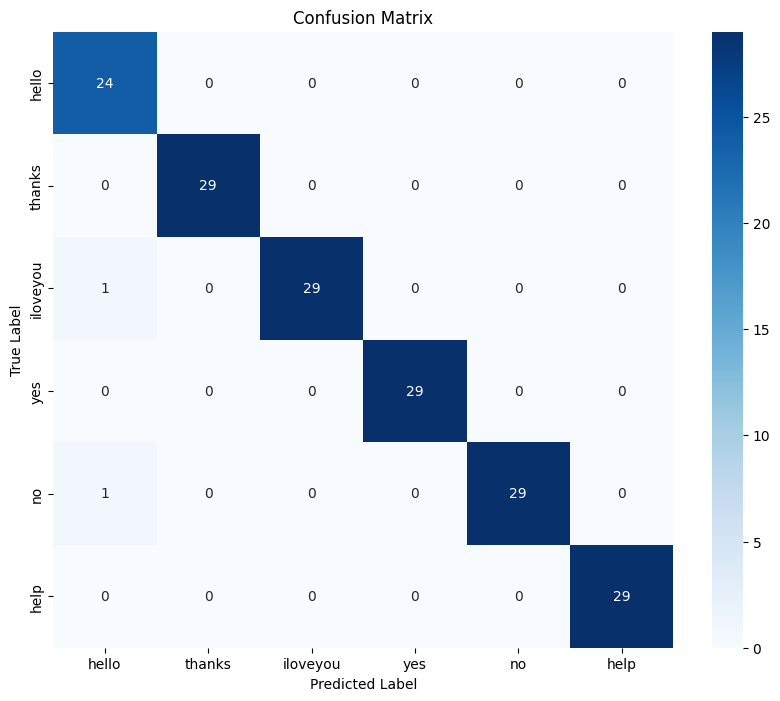

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Perform predictions on the test set
yhat = model.predict(X_train)
ytrue = np.argmax(y_train, axis=1)
yhat = np.argmax(yhat, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Define the labels for the confusion matrix
labels = actions

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [88]:
unique_classes_yhat = np.unique(yhat)
unique_classes_ytrue = np.unique(ytrue)
print("Unique classes in predictions:", unique_classes_yhat)
print("Unique classes in true labels:", unique_classes_ytrue)

Unique classes in predictions: [0 1 2 3 4 5]
Unique classes in true labels: [0 1 2 3 4 5]


In [90]:
# Compute confusion matrix for each action
confusion_matrices = multilabel_confusion_matrix(ytrue, yhat)

# Compute accuracy for each action
accuracies = {}
for i, action in enumerate(actions):
    tn, fp, fn, tp = confusion_matrices[i].ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracies[action] = accuracy

# Display accuracy for each action
for action, accuracy in accuracies.items():
    print(f"Accuracy for {action}: {accuracy}")


Accuracy for hello: 0.9883040935672515
Accuracy for thanks: 1.0
Accuracy for iloveyou: 0.9941520467836257
Accuracy for yes: 1.0
Accuracy for no: 0.9941520467836257
Accuracy for help: 1.0


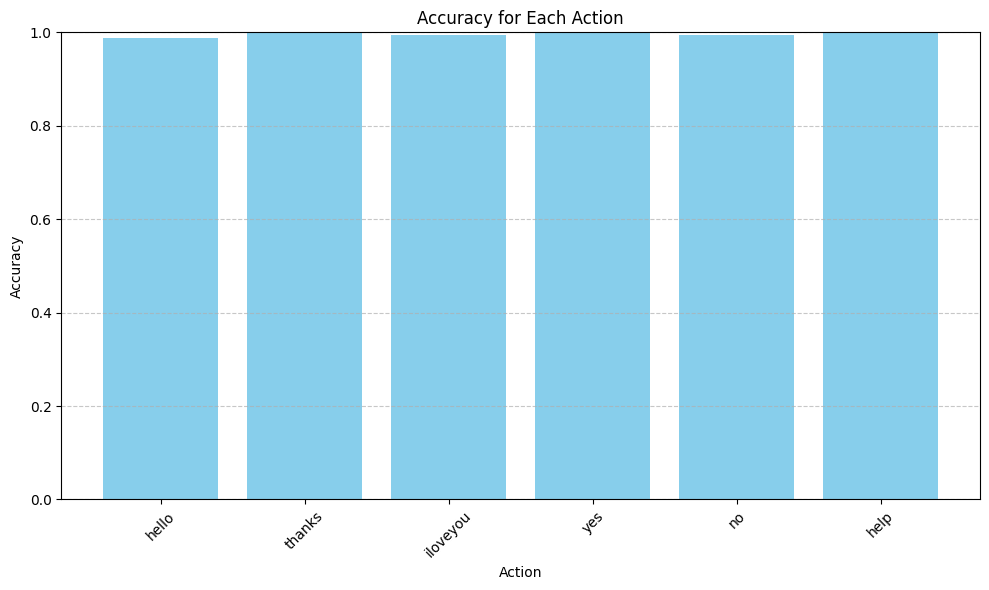

In [91]:
import matplotlib.pyplot as plt

# Plot the accuracy for each action
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Action')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Action')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [94]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.75

cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #         sequence.insert(0,keypoints)
        #         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            # 3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available
